In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import MeCab
from gensim import corpora 
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [2]:
model_path = 'word2vec.gensim.model'
model = Word2Vec.load(model_path)

mecab = MeCab.Tagger("-Ochasen")

mecab.parse('')

'EOS\n'

In [3]:
def dist_kyoten(lst):
    try:
        r=requests.get(lst[1])
        soup=BeautifulSoup(r.content,'html.parser')
        l=[]
        for i in soup.find_all():

            if i.string is not None and i.name not in ('script'):

                node = mecab.parseToNode(i.string)

                while node:
                    if node.feature.split(u",")[0] == u"名詞" and node.feature.split(u",")[1] in (u"固有名詞", u"一般"):
                        if node.surface in model.wv.vocab:
                            l.append([lst[0],i.name,node.surface,model.similarity(node.surface,'拠点')])
                    node = node.next
        return l
    except:
        print("ERROR:", lst[0])

def dist_kojo(lst):
    try:
        r=requests.get(lst[1])
        soup=BeautifulSoup(r.content,'html.parser')
        l=[]
        for i in soup.find_all():

            if i.string is not None and i.name not in ('script'):

                node = mecab.parseToNode(i.string)

                while node:
                    if node.feature.split(u",")[0] == u"名詞" and node.feature.split(u",")[1] in (u"固有名詞", u"一般"):
                        if node.surface in model.wv.vocab:
                            l.append([lst[0],i.name,node.surface,model.similarity(node.surface,'工場')])
                    node = node.next
        return l
    except:
        print("ERROR:", lst[0])
        

In [91]:
l=[[1,'～']]


#“拠点”との類似度
r=list(map(dist_kyoten,l))
#“工場”との類似度
k=list(map(dist_kojo,l))

ERROR: 12


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


ERROR: 212
ERROR: 12


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


ERROR: 212


In [92]:
r[:5]

[[[1, 'title', 'Honda', 0.10209291793238374],
  [1, 'title', '会社', 0.41019433714938713],
  [1, 'title', '会社', 0.41019433714938713],
  [1, 'title', '概要', 0.085894521454771305],
  [1, 'title', 'Honda', 0.10209291793238374],
  [1, 'title', 'グループ', 0.26453416120094497],
  [1, 'title', '拠点', 1.0],
  [1, 'h1', 'Honda', 0.10209291793238374],
  [1, 'h1', 'The', -0.097591406677765391],
  [1, 'h1', 'Power', 0.019288906832239956],
  [1, 'h1', 'of', -0.11564913902089001],
  [1, 'h1', 'Dreams', -0.075100814756306519],
  [1, 'a', 'Honda', 0.10209291793238374],
  [1, 'a', 'The', -0.097591406677765391],
  [1, 'a', 'Power', 0.019288906832239956],
  [1, 'a', 'of', -0.11564913902089001],
  [1, 'a', 'Dreams', -0.075100814756306519],
  [1, 'li', 'ニュース', 0.18186148664991872],
  [1, 'a', 'ニュース', 0.18186148664991872],
  [1, 'li', 'IR', 0.035907037175343687],
  [1, 'li', '情報', 0.28690670344648217],
  [1, 'a', 'IR', 0.035907037175343687],
  [1, 'a', '情報', 0.28690670344648217],
  [1, 'li', '情報', 0.28690670344648

In [93]:
k[:5]

[[[1, 'title', 'Honda', 0.15267932227711858],
  [1, 'title', '会社', 0.67398959049058493],
  [1, 'title', '会社', 0.67398959049058493],
  [1, 'title', '概要', -0.10825935266088783],
  [1, 'title', 'Honda', 0.15267932227711858],
  [1, 'title', 'グループ', 0.32570055025880484],
  [1, 'title', '拠点', 0.4238847930125868],
  [1, 'h1', 'Honda', 0.15267932227711858],
  [1, 'h1', 'The', -0.12336579780520326],
  [1, 'h1', 'Power', 0.11264779636068578],
  [1, 'h1', 'of', -0.22640346158500396],
  [1, 'h1', 'Dreams', -0.14667372860240277],
  [1, 'a', 'Honda', 0.15267932227711858],
  [1, 'a', 'The', -0.12336579780520326],
  [1, 'a', 'Power', 0.11264779636068578],
  [1, 'a', 'of', -0.22640346158500396],
  [1, 'a', 'Dreams', -0.14667372860240277],
  [1, 'li', 'ニュース', 0.021250144509582319],
  [1, 'a', 'ニュース', 0.021250144509582319],
  [1, 'li', 'IR', 0.19720272531604049],
  [1, 'li', '情報', -0.039159872951196363],
  [1, 'a', 'IR', 0.19720272531604049],
  [1, 'a', '情報', -0.039159872951196363],
  [1, 'li', '情報', -0.

In [7]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import cross_validation

/home/vagrant/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
df_kyoten1=pd.DataFrame(columns=['id', 'tag' ,'text', 'sim'])

for i in range(len(r)):
    df0=pd.DataFrame(r[i],columns=['id', 'tag' ,'text', 'sim'])
    df_kyoten1=df_kyoten1.append(df0, ignore_index = True)

In [95]:
df_kyoten1

,id,tag,text,sim
0,1,title,Honda,0.102093
1,1,title,会社,0.410194
2,1,title,会社,0.410194
3,1,title,概要,0.085895
4,1,title,Honda,0.102093
5,1,title,グループ,0.264534
6,1,title,拠点,1.000000
7,1,h1,Honda,0.102093
8,1,h1,The,-0.097591
9,1,h1,Power,0.019289


In [96]:
df_kyoten2=pd.DataFrame(df_kyoten1.groupby(['id', 'tag'])["sim"].max(),columns=[ 'sim'])
df_kyoten2

sim
id  tag            
1   a      1.000000
    br     0.019289
    dd     0.570119
    dt     0.473633
    em     0.131870
    h1     0.264534
    h2     0.397933
    h3     0.373027
    h4     0.599477
    li     1.000000
    span  -0.214364
    td     0.550029
    th     0.160455
    title  1.000000
2   a      1.000000
    dd     0.577753
    div    0.263620
    dt     0.414290
    h1     1.000000
    li     1.000000
    title  1.000000
3   a      0.384367
    dd     0.339141
    h1     1.000000
    h3     0.410194
    h4     0.396248
    li     0.286907
    span   0.384367
    td     0.459132
    th     0.459132
...             ...
239 dt     0.070803
    li     0.354607
    span   0.384367
    title  0.313607
240 a      0.313607
    dd     0.286907
    title  0.313607
241 a      0.410194
    div    0.410194
    h2     0.286907
    li     0.410194
    span   0.286907
    td    -0.098685
    title  0.313607
242 a      0.423885
    li     0.423885
    style  0.026701
    title  0.313607
243 a      0.286907
    title  0.313607
244 a      0.423885
    br     0.169843
    div    0.036047
    h1    -0.098685
    h2     0.410194
    h3     0.286907
    li     0.410194
    small  0.272461
    span   0.277374
    title  0.410194

[1019 rows x 1 columns]

In [97]:
df_kyoten3=df_kyoten2.reset_index()
df_kyoten3

,id,tag,sim
0,1,a,1.000000
1,1,br,0.019289
2,1,dd,0.570119
3,1,dt,0.473633
4,1,em,0.131870
5,1,h1,0.264534
6,1,h2,0.397933
7,1,h3,0.373027
8,1,h4,0.599477
9,1,li,1.000000


In [98]:
df_kyoten4=df_kyoten3.pivot(index='id', columns='tag', values='sim')
df_kyoten4

tag,a,abbr,address,b,br,button,caption,dd,div,dt,...,small,span,strong,style,sup,td,th,time,title,ul
id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,NaN,0.019289,NaN,NaN,0.570119,NaN,0.473633,...,NaN,-0.214364,NaN,NaN,NaN,0.550029,0.160455,NaN,1.000000,NaN
2,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.263620,0.414290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
3,0.384367,NaN,NaN,NaN,NaN,NaN,NaN,0.339141,NaN,NaN,...,NaN,0.384367,NaN,NaN,NaN,0.459132,0.459132,NaN,1.000000,NaN
4,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121215,NaN,...,0.478135,0.072431,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
5,0.572969,-0.024134,NaN,0.033065,NaN,NaN,NaN,0.583583,0.384367,0.572969,...,NaN,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
6,0.478135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459132,NaN,...,0.577753,0.459132,NaN,NaN,NaN,0.577753,NaN,NaN,0.459132,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079282,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
9,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.599477,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [99]:
df_kyoten5=df_kyoten4.reset_index()
df_kyoten5

tag,id,a,abbr,address,b,br,button,caption,dd,div,...,small,span,strong,style,sup,td,th,time,title,ul
0,1,1.000000,NaN,NaN,NaN,0.019289,NaN,NaN,0.570119,NaN,...,NaN,-0.214364,NaN,NaN,NaN,0.550029,0.160455,NaN,1.000000,NaN
1,2,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,0.263620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
2,3,0.384367,NaN,NaN,NaN,NaN,NaN,NaN,0.339141,NaN,...,NaN,0.384367,NaN,NaN,NaN,0.459132,0.459132,NaN,1.000000,NaN
3,4,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121215,...,0.478135,0.072431,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
4,5,0.572969,-0.024134,NaN,0.033065,NaN,NaN,NaN,0.583583,0.384367,...,NaN,0.410194,NaN,NaN,NaN,NaN,NaN,NaN,0.410194,NaN
5,6,0.478135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.459132,...,0.577753,0.459132,NaN,NaN,NaN,0.577753,NaN,NaN,0.459132,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079282,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
8,9,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.577753,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
9,10,0.237635,NaN,NaN,0.372455,NaN,NaN,NaN,NaN,NaN,...,0.263620,0.372455,NaN,NaN,NaN,0.369936,0.372455,NaN,1.000000,NaN


In [100]:
df_kyoten6=df_kyoten5.fillna(df_kyoten5.mean())
df_kyoten6

tag,id,a,abbr,address,b,br,button,caption,dd,div,...,small,span,strong,style,sup,td,th,time,title,ul
0,1,1.000000,-0.024134,0.253828,0.087651,0.019289,0.263492,0.422862,0.570119,0.290217,...,0.269432,-0.214364,0.409991,0.026127,-0.149032,0.550029,0.160455,-0.155466,1.000000,0.105674
1,2,1.000000,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.577753,0.263620,...,0.269432,0.413585,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,1.000000,0.105674
2,3,0.384367,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.339141,0.290217,...,0.269432,0.384367,0.409991,0.026127,-0.149032,0.459132,0.459132,-0.155466,1.000000,0.105674
3,4,0.410194,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.413158,0.121215,...,0.478135,0.072431,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,0.410194,0.105674
4,5,0.572969,-0.024134,0.253828,0.033065,0.192585,0.263492,0.422862,0.583583,0.384367,...,0.269432,0.410194,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,0.410194,0.105674
5,6,0.478135,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.413158,0.459132,...,0.577753,0.459132,0.409991,0.026127,-0.149032,0.577753,0.476704,-0.155466,0.459132,0.105674
6,7,0.575965,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.413158,-0.079282,...,0.269432,1.000000,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,1.000000,0.105674
7,8,0.575965,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.413158,0.290217,...,0.269432,0.413585,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,1.000000,0.105674
8,9,1.000000,-0.024134,0.253828,0.087651,0.192585,0.263492,0.422862,0.413158,0.577753,...,0.269432,1.000000,0.409991,0.026127,-0.149032,0.322379,0.476704,-0.155466,1.000000,0.105674
9,10,0.237635,-0.024134,0.253828,0.372455,0.192585,0.263492,0.422862,0.413158,0.290217,...,0.263620,0.372455,0.409991,0.026127,-0.149032,0.369936,0.372455,-0.155466,1.000000,0.105674


In [101]:
xv=df_kyoten6.drop('id', axis=1)
yv=df_kyoten6["id"].apply( lambda x: 1 if x <= 99 else 0 )
a=xv.values

class x:
    def __init__(self, code, name):
        x.values = values
        x.name = name

x.values=[[float(a[i][j]) for j in range(len(a[i]))] for i in range(len(a))]
x.label=xv.columns.values

y=list(map(int,yv.values))

x_train,x_test,y_train,y_test=train_test_split(x.values,y,stratify=y,random_state=66)

In [102]:
#ロジスティック回帰
log001 = LogisticRegression(C=0.01)
log001.fit(x_train, y_train)
print("C=0.01 再代入誤り率：",1-log001.score(x_train,y_train))
print("C=0.01 ホールドアウト誤り率：",1-log001.score(x_test,y_test))

log1 = LogisticRegression(C=1)
log1.fit(x_train, y_train)
print("C=1 再代入誤り率：",1-log1.score(x_train,y_train))
print("C=1 ホールドアウト誤り率：",1-log1.score(x_test,y_test))

log100 = LogisticRegression(C=100)
log100.fit(x_train, y_train)
print("C=100 再代入誤り率：",1-log100.score(x_train,y_train))
print("C=100 ホールドアウト誤り率：",1-log100.score(x_test,y_test))

log10000 = LogisticRegression(C=10000)
log10000.fit(x_train, y_train)
print("C=10000 再代入誤り率：",1-log10000.score(x_train,y_train))
print("C=10000 ホールドアウト誤り率：",1-log10000.score(x_test,y_test))

C=0.01 再代入誤り率： 0.336734693878
C=0.01 ホールドアウト誤り率： 0.333333333333
C=1 再代入誤り率： 0.15306122449
C=1 ホールドアウト誤り率： 0.121212121212
C=100 再代入誤り率： 0.0408163265306
C=100 ホールドアウト誤り率： 0.030303030303
C=10000 再代入誤り率： 0.030612244898
C=10000 ホールドアウト誤り率： 0.0909090909091


([<matplotlib.axis.XTick at 0x7fcac26de208>,
 <a list of 36 Text xticklabel objects>)

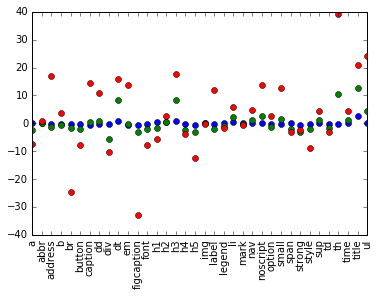

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(log1.coef_.T,'o',label='C=1')
plt.plot(log100.coef_.T,'o',label='C=100')
plt.plot(log10000.coef_.T,'o',label='C=10000')

plt.xticks(range(len(x.label)),x.label,rotation=90)


再代入誤り率： 0.0102040816327
ホールドアウト誤り率： 0.0606060606061


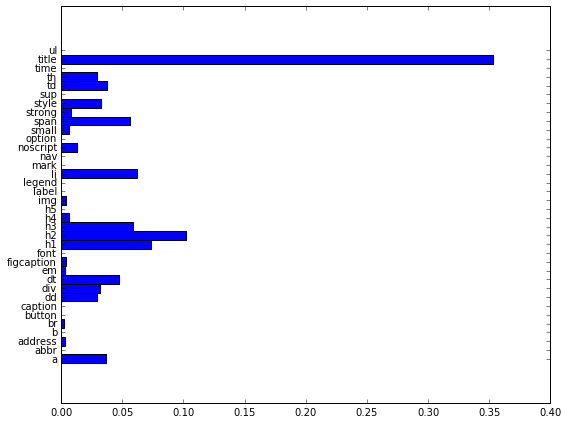

In [103]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(x_train, y_train)
print("再代入誤り率：", 1 - clf.score(x_train, y_train))   
print("ホールドアウト誤り率：", 1 - clf.score(x_test, y_test))

plt.figure(figsize=(8,6))
plt.barh(range(len(x.label)),clf.feature_importances_,height=1,align="center")

plt.yticks(range(len(x.label)),x.label)
plt.tight_layout()

In [104]:
#工場
df_kojo1=pd.DataFrame(columns=['id', 'tag' ,'text', 'sim'])

for i in range(len(k)):
    df0=pd.DataFrame(k[i],columns=['id', 'tag' ,'text', 'sim'])
    df_kojo1=df_kyoten1.append(df0, ignore_index = True)

In [105]:
df2=pd.DataFrame(df_kojo1.groupby(['id', 'tag'])["sim"].max(),columns=[ 'sim'])
df3=df2.reset_index()
df4=df3.pivot(index='id', columns='tag', values='sim')
df5=df4.reset_index()
df6=df5.fillna(df5.mean())
xv=df6.drop('id', axis=1)
yv=df6["id"].apply( lambda x: 1 if x <= 99 else 0 )
a=xv.values

class x:
    def __init__(self, code, name):
        x.values = values
        x.name = name

x.values=[[float(a[i][j]) for j in range(len(a[i]))] for i in range(len(a))]
x.label=xv.columns.values

y=list(map(int,yv.values))

x_train,x_test,y_train,y_test=train_test_split(x.values,y,stratify=y,random_state=77)

In [106]:
#ロジスティック回帰
log001 = LogisticRegression(C=0.01)
log001.fit(x_train, y_train)
print("C=0.01 再代入誤り率：",1-log001.score(x_train,y_train))
print("C=0.01 ホールドアウト誤り率：",1-log001.score(x_test,y_test))

log1 = LogisticRegression(C=1)
log1.fit(x_train, y_train)
print("C=1 再代入誤り率：",1-log1.score(x_train,y_train))
print("C=1 ホールドアウト誤り率：",1-log1.score(x_test,y_test))

log100 = LogisticRegression(C=100)
log100.fit(x_train, y_train)
print("C=100 再代入誤り率：",1-log100.score(x_train,y_train))
print("C=100 ホールドアウト誤り率：",1-log100.score(x_test,y_test))

log10000 = LogisticRegression(C=10000)
log10000.fit(x_train, y_train)
print("C=10000 再代入誤り率：",1-log10000.score(x_train,y_train))
print("C=10000 ホールドアウト誤り率：",1-log10000.score(x_test,y_test))

C=0.01 再代入誤り率： 0.336734693878
C=0.01 ホールドアウト誤り率： 0.333333333333
C=1 再代入誤り率： 0.15306122449
C=1 ホールドアウト誤り率： 0.0909090909091
C=100 再代入誤り率： 0.0408163265306
C=100 ホールドアウト誤り率： 0.0909090909091
C=10000 再代入誤り率： 0.030612244898
C=10000 ホールドアウト誤り率： 0.151515151515


([<matplotlib.axis.XTick at 0x7fcac1d88da0>,
 <a list of 36 Text xticklabel objects>)

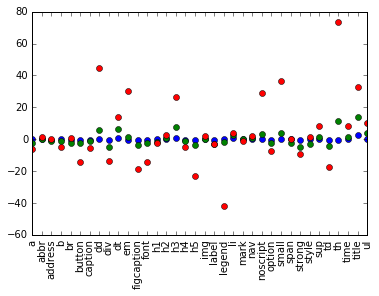

In [87]:
plt.plot(log1.coef_.T,'o',label='C=1')
plt.plot(log100.coef_.T,'o',label='C=100')
plt.plot(log10000.coef_.T,'o',label='C=10000')

plt.xticks(range(len(x.label)),x.label,rotation=90)

In [107]:
from sklearn import svm
from sklearn import cross_validation
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
print("再代入誤り率：", 1 - clf.score(x_train, y_train))   
print("ホールドアウト誤り率：", 1 - clf.score(x_test, y_test))

再代入誤り率： 0.173469387755
ホールドアウト誤り率： 0.0909090909091


In [108]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(x_train, y_train)
print("再代入誤り率：", 1 - clf.score(x_train, y_train))   
print("ホールドアウト誤り率：", 1 - clf.score(x_test, y_test))

再代入誤り率： 0.0102040816327
ホールドアウト誤り率： 0.0909090909091


再代入誤り率： 0.0102040816327
ホールドアウト誤り率： 0.0909090909091


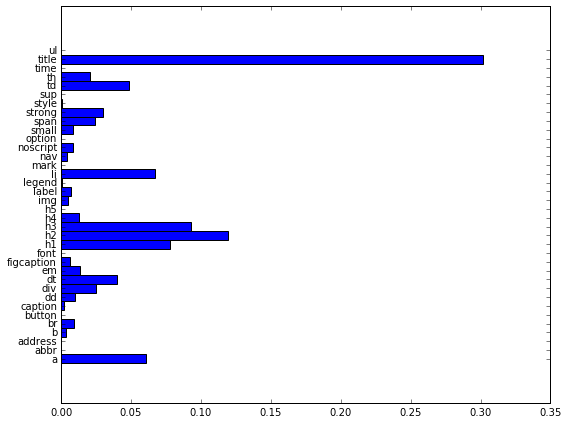

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1).fit(x_train, y_train)
print("再代入誤り率：", 1 - clf.score(x_train, y_train))   
print("ホールドアウト誤り率：", 1 - clf.score(x_test, y_test))

plt.figure(figsize=(8,6))
plt.barh(range(len(x.label)),clf.feature_importances_,height=1,align="center")

plt.yticks(range(len(x.label)),x.label)
plt.tight_layout()